# PROBLEMAS DE AUTOMATIZACIÓN Y ROBÓTICA TEMA 1
## ASPECTOS INTRODUCTORIO

En este "Notebook" Vamos a resolver los ejercicios de areas de trabajo de robots haciendo uso de python.
De esta forma veremos que con un codigo sencillo podemos disponer de las herramientas necesarias para la resolución de las mismas


### Problema 6A

 Dibujar el espacio de trabajo para los siguientes robots planares teniendo en cuenta los rangos de movimiento especificados para cada una de las articulaciones:


![alt text](RobotTema1ej6A.png "Title") 

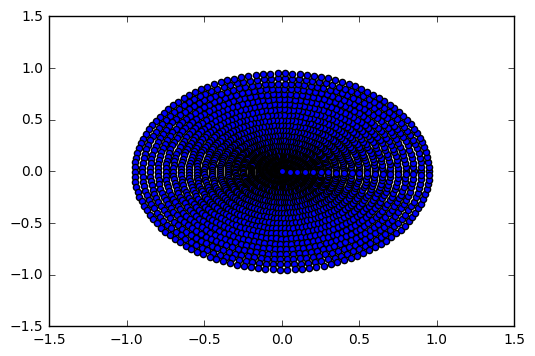

In [6]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

#Ejes
 
L1 = plt.arange(0.,1,0.05) #Crea un vector de 0 a 1 con un paso de 0.05

#Angulo

Theta1 = plt.arange(0., 2 * np.pi,0.05) #Crea un vector de 0 a 2Pi con un paso de 0.05

#malla

LM1, ThetaM1 = np.meshgrid(L1,Theta1) #Genera un array a partir de vectores

Thetav1 = np.append([ThetaM1],0) # al hacer meshgrid nos sale dos arrays 2x2, hacemos que sean dos vecotres
Lv1 = np.append([LM1],0)

# Pasamos a X Y

X = Lv1 * np.cos(Thetav1)
Y = Lv1 * np.sin(Thetav1)

#plot

plt.scatter(X,Y)


Antes de empezar, necesitamos importat las librerias necesarias para graficar y hacer calculo numerico.
Esta cabecera solo es necesaria ejecutarla una vez, es decir, se puede omitir en los siguientes ejercicios.

In [ ]:
import matplotlib.pylab as plt  #Libreria para graficar
import numpy as np #libreria para hacer calculo numerico
%matplotlib inline #Comando para hacer "print" en un "notebook"

Vamos a hacer una nube de puntos con todas las posiciones posibles que nos dejen las restricciones impuestas al angulo y a la deslizadera.
Vemos que el robot es un 1R1T, por lo tanto necesitamos 2 vectores que recorran desde la posicion minima a maxima con un paso determinado.
Recordamos que los angulos hay que darlos en radianes

In [4]:
#Ejes
 
L1 = plt.arange(0.,1,0.05) #Crea un vector de 0 a 1 con un paso de 0.05

#Angulo

Theta1 = plt.arange(0., 2 * np.pi,0.05) #Crea un vector de 0 a 2Pi con un paso de 0.05

#malla

LM1, ThetaM1 = np.meshgrid(L1,Theta1) #Genera un array a partir de vectores

Thetav1 = np.append([ThetaM1],0) # al hacer meshgrid nos sale dos arrays 2x2, hacemos que sean dos vecotres
Lv1 = np.append([LM1],0)

Hacemos las ecuaciones que nos dan la dinamica directa del robot

In [5]:
# Pasamos a X Y

X = Lv1 * np.cos(Thetav1)
Y = Lv1 * np.sin(Thetav1)

Por ultimo Graficamos. la sentencia scatter nos da puntos que relacionan X e Y.

In [ ]:
plt.scatter(X,Y)

### Problema 6B

![alt text](RobotTema1ej6B.png "Title") 

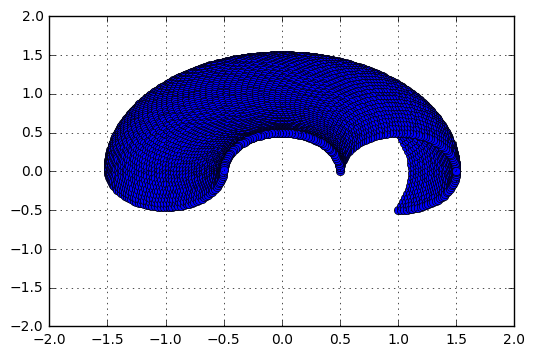

In [38]:
#funcion de grados a radianes
def grad2rad(grados):
    radianes = grados * np.pi / 180
    return radianes

def malla6(Ang1Min, Ang1Max, Ang2Min, Ang2Max, Paso=0.05):
    
    #Angulo
    Theta1 = plt.arange(grad2rad(Ang1Min),grad2rad(Ang1Max),Paso)
    Theta2 = plt.arange(grad2rad(Ang2Min),grad2rad(Ang2Max),Paso)

    #malla

    ThetaM1, ThetaM2 = np.meshgrid(Theta1,Theta2)

    # al hacer meshgrid nos sale dos matrices 2x2, hacemos que sean dos vecotres

    Thetav1 = np.append([ThetaM1],0)
    Thetav2 = np.append([ThetaM2],0)
    
    return Thetav1, Thetav2

def resolDirecta6(L1, L2, angulo1, angulo2): #Funcion para 2 ejes con referencia del segundo relativa al primero

    #Posicion punta del eje1
    X1= L1 * np.cos(angulo1)
    Y1= L1 * np.sin(angulo1)
    #Posicion punta del eje2
    X = X1 + L2 * np.cos(angulo2 + angulo1)
    Y = Y1 + L2 * np.sin(angulo2 + angulo1)
    
    return X, Y


#Definicion del problema
Ang1Min, Ang1Max = [0, 180]
Ang2Min, Ang2Max = [-90,180]


#Ejes
L1, L2 = [1, 0.5]

Paso = 0.05

#Resolucion

Thetav1, Thetav2 = malla6(Ang1Min, Ang1Max, Ang2Min, Ang2Max, Paso)
X, Y = resolDirecta6(L1, L2, Thetav1, Thetav2)

#plot

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
ax.patch.set_alpha(0.01)
ax.plot(X, Y, 'bo')



El codigo necesario para este ejercicio es el mismo que en el anterior, sin embargo, hemos metido en funciones parte del codigo, de forma que lo podamos reutilizar.


Tambien se ha cambiado la forma de graficar. Se ha elegido hacerlo mediante subgraficas, lo que nos permitira mas adelante introducir varias graficas juntas. Tambien se a cambiado la grafica scatter por plot(, ,'bo') dado que esta ultima tiene un mayor rendimiento.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
ax.patch.set_alpha(0.01)
ax.plot(X, Y, 'bo')

### Problema 6B y 6C

Miso robot que el 6A pero con diferentes restricciones 
6B Rango de movimiento: 0<ϑ1<90
0<ϑ2<90.
6C Rango de movimiento: 0<ϑ1<180
0<ϑ2<180.

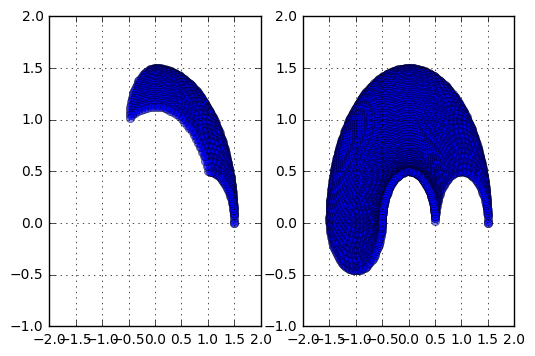

In [78]:
#Definicion del problema
Paso = 0.05
#6B
#angulo

Ang1Min, Ang1Max = [0, 90]
Ang2Min, Ang2Max = [0,90]

#Ejes
L1, L2 = [1, 0.5]

#Resolucion

Thetav1, Thetav2 = malla6(Ang1Min, Ang1Max, Ang2Min, Ang2Max, Paso)
Xb, Yb = resolDirecta6(L1, L2, Thetav1, Thetav2)

#6C
#angulo

Ang1Min, Ang1Max = [0, 180]
Ang2Min, Ang2Max = [0,180]

#Ejes
L1, L2 = [1, 0.5]



#Resolucion

Thetav1, Thetav2 = malla6(Ang1Min, Ang1Max, Ang2Min, Ang2Max, Paso)
Xc, Yc = resolDirecta6(L1, L2, Thetav1, Thetav2)

#plot

fig = plt.figure()
axb = fig.add_subplot(121, autoscale_on=False, xlim=(-2, 2), ylim=(-1, 2))
axc = fig.add_subplot(122, autoscale_on=False, xlim=(-2, 2), ylim=(-1, 2))

axb.grid()
axb.plot(Xb, Yb, linestyle = 'None', color='b',marker = 'o', alpha=0.5)

axc.grid()
axc.plot(Xc, Yc, linestyle = 'None', color='b',marker = 'o', alpha=0.5)



En este caso hemos usado las funciones definidas en el problema anterior, ademas hemos cambiado hecho uso de los subplot anteriormente mencionados.

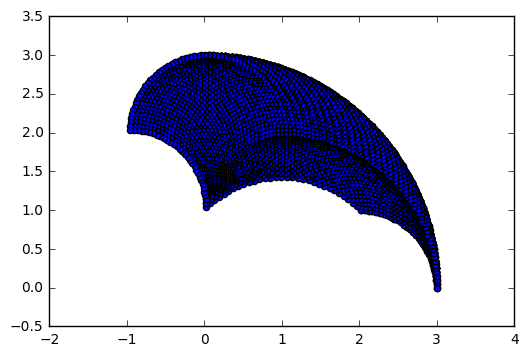

In [47]:

#Ejes
L1 = 1
L2 = 1
L3 = 1

#Angulo
Theta1 = plt.arange(0.,np.pi/2,0.05)
Theta2 = plt.arange(0,np.pi/2,0.05)
Theta3 = plt.arange(0,np.pi/2,0.05)


#malla

ThetaM1, ThetaM2, ThetaM3 = np.meshgrid(Theta1,Theta2,Theta3)

Thetav1 = np.append([ThetaM1],0)
Thetav2 = np.append([ThetaM2],0)
Thetav3 = np.append([ThetaM3],0)

# Pasamos a X Y

X = L1 * np.cos(Thetav1) + L2 * np.cos(Thetav2 ) + L3 * np.cos(Thetav2  + Thetav3)
Y = L1 * np.sin(Thetav1) + L2 * np.sin(Thetav2 ) + L3 * np.sin(Thetav2  + Thetav3)

#plot

plt.scatter(X, Y)

In [ ]:
#Ejes
L1 = 1
L2 = 0.5
L3 = 0.2

#Angulo
Theta1 = plt.arange(0.,mt.pi/2,0.1)
Theta2 = plt.arange(0,mt.pi/2,0.1)
Theta3 = plt.arange(0,mt.pi,0.5)


#malla

Thetav1, Thetav2, Thetav3 = np.meshgrid(Theta1,Theta2,Theta3)

# Pasamos a X Y

X = L1 * np.cos(Thetav1) + L2 * np.cos(Thetav2 + Thetav1) + L3 * np.cos(Thetav2 + Thetav1 + Thetav3)
Y = L1 * np.sin(Thetav1) + L2 * np.sin(Thetav2 + Thetav1) + L3 * np.sin(Thetav2 + Thetav1 + Thetav3)

#plot

plt.scatter(X, Y, alpha=0.2)


# Prueba de deslizaderas

In [ ]:
%matplotlib inline
from IPython.display import display
from ipywidgets import interactive, interact, widget
import numpy as np
import matplotlib.pylab as plt

In [ ]:
#Caracteristicas 

#Ejes
L1, L2 = [1, 0.5]
#Angulo
min1, max1 = [0.,90] 
min2, max2 = [0.,90]

def f(L1, L2, angulo1, angulo2): #Funcion para 2 ejes con referencia del segundo relativa al primero
    #Angulo
    Theta1 = angulo1*(mt.pi/180)
    Theta2 = angulo2*(mt.pi/180)
    
    #Posicion punta del eje.
    
    X1= L1 * np.cos(Theta1)
    Y1= L1 * np.sin(Theta1)

    X = X1 + L2 * np.cos(Theta2 + Theta1)
    Y = Y1 + L2 * np.sin(Theta2 + Theta1)
    
    return X1, Y1, X, Y

#malla

Theta1 = plt.arange(min1,max1,5)
Theta2 = plt.arange(min2,max2,5)

ThetaM1, ThetaM2 = np.meshgrid(Theta1,Theta2)

# al hacer meshgrid nos sale dos matrices 2x2, hacemos que sean dos vecotres

Thetav1 = np.append([ThetaM1],0)
Thetav2 = np.append([ThetaM2],0)

# Hacemos 4 vectores con las posiciones de la punta ca cada eje
X1, Y1, X, Y = f(L1, L2, Thetav1, Thetav2)

def interact(x,y):
    X1, Y1, Xa, Ya = f(L1, L2, x, y)
    fig = plt.figure()
    #Configuracion del plot
    ax2 = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(0, 2))
    ax2.grid()
    ax2.patch.set_alpha(0.01)
    #Los dos elementos, area y barras
    ax2.plot([0,X1,Xa],[0,Y1,Ya],'-r')
    ax2.plot(X, Y, 'bo')
    
w = interactive(interact, x=(min1,max1), y=(min2,max2))
display(w)



In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML


#Ejes
L1 = 1
L2 = 0.5

#Angulo
Theta1 = plt.arange(0.,mt.pi,0.1)
Theta2 = plt.arange(-mt.pi/2,mt.pi,0.1)

#malla

ThetaM2, ThetaM1 = np.meshgrid(Theta2,Theta1)

# al hacer meshgrid nos sale dos matrices 2x2, hacemos que sean dos vecotres

Thetav1 = np.append([ThetaM1],0)
Thetav2 = np.append([ThetaM2],0)

# Pasamos a X Y

X1 = L1 * np.cos(Thetav1)
Y1 = L1 * np.sin(Thetav1)

X2 = L2 * np.cos(Thetav2 + Thetav1)
Y2 = L2 * np.sin(Thetav2 + Thetav1)

X = X1 + X2
Y = Y1 + Y2

#plot
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dt = 10

ax.scatter(X,Y, alpha = 0.2)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    
    
    thisx = [0, X1[i], X[i]]
    thisy = [0, Y1[i], Y[i]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt/1000))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Y)),
                              interval=dt, blit=True, init_func=init)




#ani.save('Area_trabajo.mp4', fps=15)
#plt.show()

HTML(ani.to_html5_video())



# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

ani


In [ ]:
import matplotlib.pylab as plt
import numpy as np
import math as mt
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


#Ejes
L1 = 1
L2 = 0.5

#Angulo
Theta1 = plt.arange(0.,mt.pi,0.5)
Theta2 = plt.arange(-mt.pi/2,mt.pi,0.5)

#malla

ThetaM2, ThetaM1 = np.meshgrid(Theta2,Theta1)

# al hacer meshgrid nos sale dos matrices 2x2, hacemos que sean dos vecotres

Thetav1 = np.append([ThetaM1],0)
Thetav2 = np.append([ThetaM2],0)

# Pasamos a X Y

X1 = L1 * np.cos(Thetav1)
Y1 = L1 * np.sin(Thetav1)

X2 = L2 * np.cos(Thetav2 + Thetav1)
Y2 = L2 * np.sin(Thetav2 + Thetav1)

X = X1 + X2
Y = Y1 + Y2



#plot
fig = plt.figure()
ax = fig.add_subplot(121, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line1, = ax.plot([], [], 'bo', lw=2)
line0, = ax.plot([], [], '-r', lw=2)

dt = 100


def init():
    line1.set_data([], [])
    line0.set_data([], [])
    return line1,line0


def animate(i):
    
    
    thisx = [0, X1[i], X[i]]
    thisy = [0, Y1[i], Y[i]]
    line1.set_data(X[:i], Y[:i])
    line0.set_data(thisx, thisy)
    
    return line1,line0

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Y)),
                              interval=dt, blit=True, init_func=init)

#ani.save('Area_trabajo.mp4', fps=15)
#plt.show()

HTML(ani.to_html5_video())

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

ani